- Gabriel Quiroz 19255
- Jose Pablo Ponce 19092

In [1]:
#Importar las librerías

import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn import feature_extraction, tree, model_selection, metrics
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from yellowbrick.features import Rank2D
from yellowbrick.features import RadViz

## Parte 1 – Ingeniería de características


### Exploración de datos

1. Cargue el dataset en un dataframe de pandas, muestre un ejemplo de cinco observaciones.


In [2]:
## Cargar el dataset proporcionado
df = pd.read_csv('dataset_pishing.csv')
print(df.shape)
pd.set_option('display.max_columns', None)
df.sample(n=5).head() 

(11430, 67)


,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
10665,https://secure-login-portal-outlook.el.r.appsp...,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,9,2,1,1,4,15,7,15,5.888889,4.857143,9.5,1,0,0,0,0,0,21,0.190476,0.809524,0,1,0,0.176471,0,0.000000,0,1,0.0,0,20.0,80.0,0,0,0,25.000000,0,0,0,1,1,0,228,5616,0,0,1,5,phishing
9052,http://www.roommanager.com.au/,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,2,5,3,3,0,11,11,0,7.000000,7.000000,0.0,0,0,0,0,0,0,130,0.923077,0.076923,0,0,0,0.300000,0,0.100000,0,0,96.0,0,0.0,100.0,0,0,0,64.285714,0,0,0,1,0,0,0,-1,800711,0,0,2,legitimate
4402,https://en.wikipedia.org/wiki/Data_definition_...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,6,0,2,2,4,10,9,10,6.166667,5.500000,6.5,0,1,0,0,0,0,358,0.963687,0.036313,0,0,0,0.307692,0,0.076923,0,0,100.0,0,100.0,0.0,0,0,0,71.111111,0,0,0,0,1,0,901,7134,12,0,0,7,legitimate
284,http://toppave.com.sg,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,7,7,0,7,7,0,7.000000,7.000000,0.0,0,0,0,0,0,0,14,0.500000,0.500000,0,2,0,0.000000,0,0.000000,0,1,50.0,0,0.0,0.0,0,0,0,100.000000,0,0,0,1,0,0,189,4924,0,0,0,1,legitimate
9156,http://www.higherlowergame.com/,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,15,15,0,9.000000,9.000000,0.0,0,0,0,0,0,0,20,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.0,0,100.0,0.0,0,0,0,0.000000,0,0,0,1,0,0,114,-1,97934,0,0,3,legitimate


2. Muestre la cantidad de observaciones etiquetadas en la columna status como “legit” y como
“pishing”. ¿Está balanceado el dataset?

In [3]:
print('legitimate:', len(df[df['status']=='legitimate']))
print('phising:', len(df[df['status']=='phishing']))

legitimate: 5715
phising: 5715


Como se puede observar hay la misma cantidad de observaciones tanto para "legitimate" y "phising", por ende se puede afirmar que el dataset esta balanceado

### Derivación de características


En base al artículo “Towards Benchmark Datasets for ML Based Wensite Phishing Detection: An
Experimental Study”, derivar las características basadas en el dominio: f1, f2, f4 – f20, f25, f26 y f27.

In [4]:
from urllib.parse import urlparse
def get_hostname(url):
    o = urlparse(url)
    return o.hostname
    
df['hostname'] = df['url'].apply(get_hostname)


In [5]:
#f1
df['f1'] = df['url'].str.len()


In [6]:

#f2
df['f2'] = df['hostname'].str.len()


In [7]:
#f4
df['f4'] = df['url'].str.count('\\.')

#f5
df['f5'] = df['url'].str.count('\\-')

#f6
df['f6'] = df['url'].str.count('\\@')

#f7
df['f7'] = df['url'].str.count('\\?')

#f8
df['f8'] = df['url'].str.count('\\&')

#f9
df['f9'] = df['url'].str.count('\\|')

#f10
df['f10'] = df['url'].str.count('\\=')

#f11
df['f11'] = df['url'].str.count('\\_')

#f12
df['f12'] = df['url'].str.count('\\˜')

#f13
df['f13'] = df['url'].str.count('\\%')

#f14
df['f14'] = df['url'].str.count('\\/')

#f15
df['f15'] = df['url'].str.count('\\*')

#f16
df['f16'] = df['url'].str.count('\\:')

#f17
df['f17'] = df['url'].str.count('\\,')

#f18
df['f18'] = df['url'].str.count('\\;')

#f19
df['f19'] = df['url'].str.count('\\$')

#f20
df['f20'] = df['url'].str.count('\\%20')


In [8]:
#f25
df['f25'] = df['url'].str.startswith('https')
df["f25"] = df["f25"].astype(int)


In [9]:
#f26
def count_digits(url):
    digits = sum(c.isdigit() for c in url)
    url_len = len(url)
    return digits / url_len

df["f26"] = df["url"].apply(count_digits)

In [10]:
#f27
df["f27"] = df["hostname"].apply(count_digits)

In [11]:
df.sample(n=5).head() 

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,hostname,f1,f2,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f25,f26,f27
6471,http://elexusbett.blogspot.com,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,2,1,8,8,0,10,10,0,9.000000,9.000000,0.0,0,1,0,0,0,0,14,0.071429,0.928571,0,0,0,0.846154,0,0.615385,0,1,0.000000,0,0.000000,0.000000,0,0,0,14.285714,0,0,0,1,0,0,374,7295,0,0,1,5,phishing,elexusbett.blogspot.com,30,23,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0.0,0.0
5589,http://www.fulton-armory.com/,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,3,3,3,3,0,6,6,0,5.000000,5.000000,0.0,0,0,0,0,0,0,242,0.966942,0.033058,0,0,0,0.125000,0,0.125000,0,0,90.909091,0,93.939394,6.060606,0,0,0,0.000000,0,0,0,0,1,0,191,8576,1715731,0,0,5,legitimate,www.fulton-armory.com,29,21,2,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0.0,0.0
4314,http://www.vantaiduccuong.com/kom/Gdoccc/,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,4,7,3,3,3,14,14,6,6.500000,8.500000,4.5,0,0,0,0,0,0,8,0.875000,0.125000,0,0,0,1.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,50.000000,0,0,0,0,1,0,20,385,0,0,1,0,phishing,www.vantaiduccuong.com,41,22,2,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0.0,0.0
217,https://www.handshq.com/,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,7,7,0,5.000000,5.000000,0.0,0,0,0,0,0,0,72,0.861111,0.138889,0,1,0,0.000000,0,0.500000,0,1,66.666667,0,100.000000,0.000000,0,0,0,25.000000,0,0,0,1,0,0,2864,2980,1168093,0,0,2,legitimate,www.handshq.com,24,15,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0.0,0.0
1854,https://pinpinxiangcy.world.tmall.com/,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,4,0,3,1,5,5,0,13,13,0,7.666667,7.666667,0.0,0,1,0,0,0,0,257,0.949416,0.050584,0,0,0,0.846154,0,0.000000,0,0,96.153846,0,100.000000,0.000000,0,0,0,60.000000,0,0,0,0,0,0,450,8315,645,0,1,5,legitimate,pinpinxiangcy.world.tmall.com,38,29,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0.0,0.0


### Preprocesamiento

Realice las modificaciones necesarias para convertir la variable categórica status a una variable
binaria. Elimine la columna del dominio.

In [12]:
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})


In [13]:
df = df.drop(['hostname', 'url'], axis=1)

### Visualización de resultados


Genere un reporte de perfil con la librería pandas_profiling. Analice el reporte y determine las
columnas que son constantes, o que no tienen una varianza alta con la columna status. Almacene su
reporte como una página html.

# Falta analisis ------------------------

In [41]:
#from pandas_profiling import ProfileReport

Summarize dataset: 100%|█████████▉| 1859/1865 [06:23<00:01,  4.79it/s, Missing diagram bar]                                           c:\Users\joopa\AppData\Local\Programs\Python\Python39\lib\site-packages\missingno\missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
c:\Users\joopa\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (88).')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:

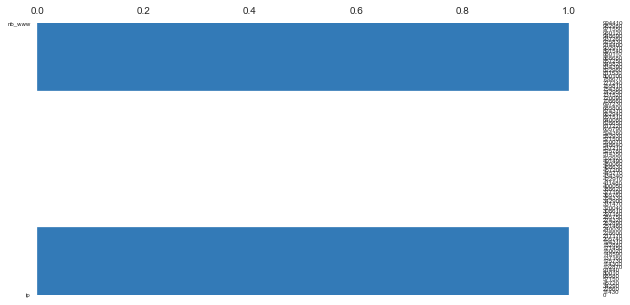

In [42]:
#prof = ProfileReport(df)
#prof.to_file(output_file='reporte.html')

### Selección de Características


En base al análisis del reporte, elimine las características repetidas o irrelevantes para la clasificación
de un sitio de pishing. Verifique que no posee observaciones repetidas.

# mira que podes eliminar que sea irrelevante ------------------------

In [14]:
df = df.drop(['domain_registration_length', 'sfh', 'submit_email', 'ratio_extErrors', 'ratio_intErrors','ratio_extRedirection', 'ratio_intRedirection', 'ratio_nullHyperlinks', 'nb_redirection', 'f9', 'f12', ], axis=1)

In [15]:
print('Duplicados antes de limpieza', df.duplicated().sum())
df = df.drop_duplicates()
print('Duplicados luego de limpieza', df.duplicated().sum())


Duplicados antes de limpieza 204
Duplicados luego de limpieza 0


## Parte 2 – Implementación


### Separación de datos


- Datos de entrenamiento: 55%
- Datos de validación: 15%
- Datos de prueba: 30%
- Almacene cada dataset como un archivo .csv

In [20]:
target = df['status']
df_final = df.drop(['status'], axis=1)

In [25]:
from sklearn.model_selection import train_test_split


In [26]:
#primera separacion 30% prueba
#x_main, x_test, y_main, y_test = train_test_split(df_final, target, test_size=0.3, random_state=123)

#segunda separacion 15% validacion y 55
#x_train, x_val, y_train, y_val = train_test_split(x_main, y_main, test_size=0.15, random_state=123)

In [32]:
train_ratio = 0.55
validation_ratio = 0.15
test_ratio = 0.30

# train is now 55% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(df_final, target, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [33]:
x_train.count()

ip              6174
nb_www          6174
nb_com          6174
nb_dslash       6174
http_in_path    6174
                ... 
f19             6174
f20             6174
f25             6174
f26             6174
f27             6174
Length: 76, dtype: int64

In [34]:
x_test.count()

ip              3369
nb_www          3369
nb_com          3369
nb_dslash       3369
http_in_path    3369
                ... 
f19             3369
f20             3369
f25             3369
f26             3369
f27             3369
Length: 76, dtype: int64

In [35]:
y_train.head()

5507    0
2696    0
856     0
3651    1
3073    1
Name: status, dtype: int64

In [36]:
y_train.value_counts()

0    3140
1    3034
Name: status, dtype: int64

In [44]:
y_val.value_counts()

0    889
1    794
Name: status, dtype: int64

### Implementación

Utilice dos algoritmos de Machine Learning para entrenar el modelo. Muestre y explique los valores
obtenidos de las siguientes métricas para los datos de validación y pruebas, para cada modelo, en
base al contexto del problema (detección de Pishing).

## Decision Tree Classifier

- Matriz de confusión
- Precision
- Recall
- F1 Score

## FALTA EXPLICACION DE METRICAS OBTENIDAS PARA VALIDACION Y PRUEBAS

## Validacion

In [40]:
clf = tree.DecisionTreeClassifier()  # clf means classifier
clf = clf.fit(x_train, y_train)

# Make the prediction
pred = clf.predict(x_val)

In [41]:
print('Confusion Matrix\n', metrics.confusion_matrix(y_val, pred))

Confusion Matrix
 [[826  63]
 [ 60 734]]


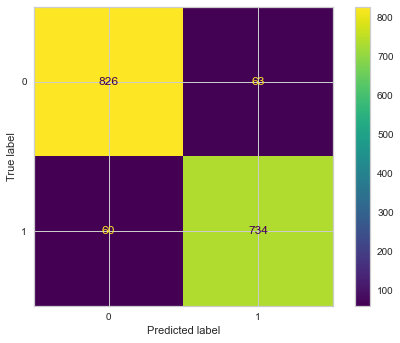

In [42]:
labels = np.unique(y_val)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_val, pred, labels=labels))
cm_display.plot()
plt.show()

In [43]:
print(metrics.classification_report(y_val, pred, target_names=['legit', 'pishing']))

              precision    recall  f1-score   support

       legit       0.93      0.93      0.93       889
     pishing       0.92      0.92      0.92       794

    accuracy                           0.93      1683
   macro avg       0.93      0.93      0.93      1683
weighted avg       0.93      0.93      0.93      1683



## Pruebas

In [45]:
pred = clf.predict(x_test)

In [46]:
print('Confusion Matrix\n', metrics.confusion_matrix(y_test, pred))

Confusion Matrix
 [[1544  142]
 [ 145 1538]]


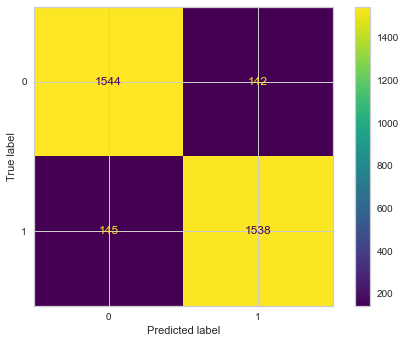

In [48]:
labels = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, pred, labels=labels))
cm_display.plot()
plt.show()

In [50]:
print(metrics.classification_report(y_test, pred, target_names=['legit', 'pishing']))

              precision    recall  f1-score   support

       legit       0.91      0.92      0.91      1686
     pishing       0.92      0.91      0.91      1683

    accuracy                           0.91      3369
   macro avg       0.91      0.91      0.91      3369
weighted avg       0.91      0.91      0.91      3369



## ALGORITMO 2

Discusión
1. ¿Cuál es el impacto de clasificar un sitio legítimo como Pishing?
2. ¿Cuál es el impacto de clasificar un sitio de Pishing como legítimo?
3. En base a las respuestas anteriores, ¿Qué métrica elegiría para comparar modelos similares
de clasificación de pishing?
4. ¿Qué modelo es mejor para la clasificación de Pishing? Justifique
5. En base a las métricas obtenidas ¿es necesaria la intervención de una persona humana para
tomar la decisión final?